In [1]:
import streamlit as st
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
from model import MNISTModel
from sklearn import metrics

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# set download to true if don't have the dataset.
fullData = torchvision.datasets.MNIST(
    root="./MNIST",
    train=True,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
    ),
    download=False,
)

cuda


/home/ykc/dev/miniconda3/envs/torch/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448238472/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
N = len(fullData)
trainL = int(0.9 * N)
testL = N - trainL

trainData, testData = Data.random_split(fullData, [trainL, testL])

In [4]:
batch_size = 512

trainLoader = Data.DataLoader(dataset=trainData, batch_size=batch_size, shuffle=True)
testLoader = Data.DataLoader(dataset=testData, batch_size=testL, shuffle=True)
testX, testY = next(iter(testLoader))
testX, testY = testX.to(device), testY.to(device)

model = MNISTModel(inChannels=1, outChannels=32).to(device)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=1e-4)
epochs = 1

/home/ykc/dev/miniconda3/envs/torch/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448238472/work/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


loss: 2.3089888095855713 val_loss: 2.3017237186431885
model saved
loss: 2.2936227321624756 val_loss: 2.298859119415283
model saved
loss: 2.2758162021636963 val_loss: 2.295647144317627
model saved
loss: 2.2558608055114746 val_loss: 2.2920191287994385
model saved
loss: 2.2341701984405518 val_loss: 2.2879037857055664
model saved
loss: 2.2139475345611572 val_loss: 2.283233165740967
model saved
loss: 2.184077739715576 val_loss: 2.2779364585876465
model saved
loss: 2.15891695022583 val_loss: 2.2719249725341797
model saved
loss: 2.1382691860198975 val_loss: 2.2651288509368896
model saved
loss: 2.0947556495666504 val_loss: 2.2574121952056885
model saved
loss: 2.065031051635742 val_loss: 2.2486965656280518
model saved
loss: 2.047805070877075 val_loss: 2.2388765811920166
model saved
loss: 2.0015506744384766 val_loss: 2.227849006652832
model saved
loss: 2.0059921741485596 val_loss: 2.2155532836914062
model saved
loss: 1.9712586402893066 val_loss: 2.201972246170044
model saved
loss: 1.939291000366

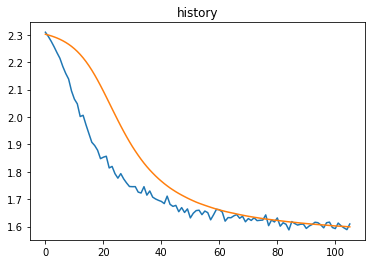

accuracy: 0.9071666666666667


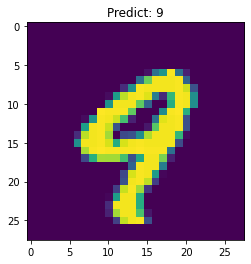

In [5]:
history = [[], []]
currentMax = np.inf
for _ in range(epochs):
    for trainX, trainY in trainLoader:
        model.train()
        trainX = trainX.to(device)
        trainY = trainY.to(device)

        result = model(trainX)
        loss = criterion(result, trainY)
        loss.backward()
        optim.step()
        optim.zero_grad()
        history[0].append(loss.item())
        with torch.no_grad():
            model.eval()
            result = model(testX)
            val_loss = criterion(result, testY)
            history[1].append(val_loss.item())
            print(f"loss: {loss.item()} val_loss: {val_loss.item()}")
        if val_loss.item() <= currentMax:
            curremtMax = val_loss.item()
            torch.save(model, "checkpoint.pt")
            print("model saved")

model = torch.load("checkpoint.pt")
with torch.no_grad():
    model.eval()
    testY = testY.cpu().numpy()
    pred = model(testX)
    _, result = torch.max(pred, 1)
    result = result.cpu().numpy()
    plt.plot(history[0], label="loss")
    plt.plot(history[1], label="val_loss")
    plt.title("history")
    plt.show()
    print(f"accuracy: {metrics.accuracy_score(testY, result)}")
    plt.imshow(testX[0].squeeze(0).cpu().numpy())
    plt.title(f"Predict: {result[0]}")
    plt.show()